In [267]:
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import imageio



In [268]:
img = 'grid.png'
image_arr = cv2.imread(img)
image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY) 

print("Shape od grid: ", image_arr.shape)

Shape od grid:  (338, 429)


In [269]:
image_arr[image_arr < 10] = 0
image_arr[image_arr >= 10] = 1

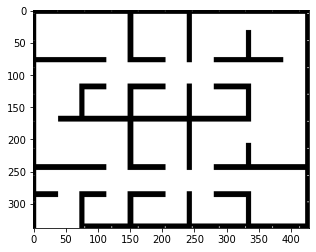

In [270]:
plt.imshow(image_arr, cmap= 'gray')
plt.show()

In [271]:
np.unique(image_arr)   #1 is open for exploring and 0 is an obstacle

array([0, 1], dtype=uint8)

In [272]:
start = (330, 10)
end = (25, 400)
grid = image_arr

In [273]:
grid_cpy = grid.copy()

## BFS

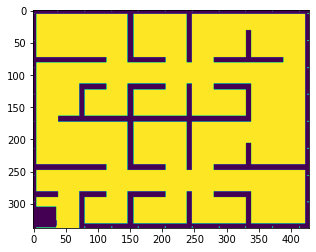

(326, 36)


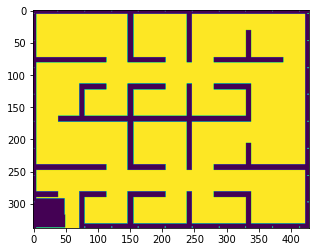

(317, 49)


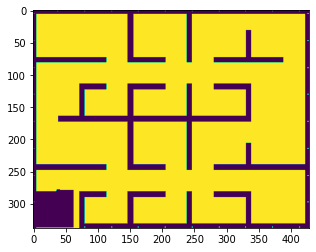

(280, 36)


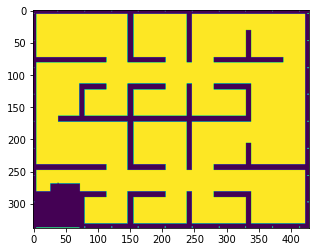

(268, 38)


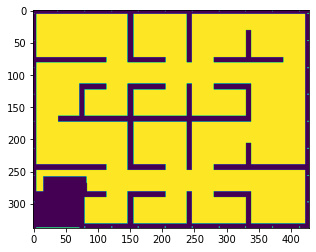

(268, 83)


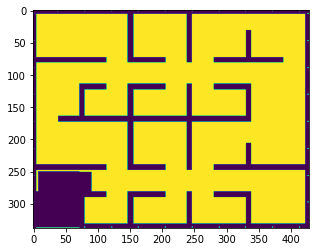

(250, 71)


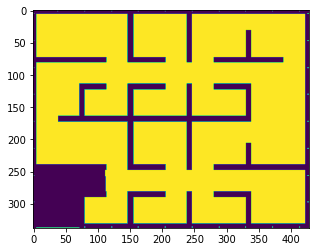

(258, 112)


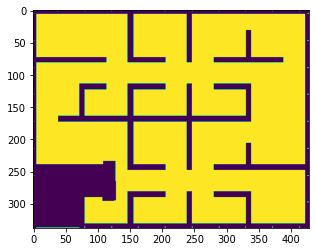

(295, 125)


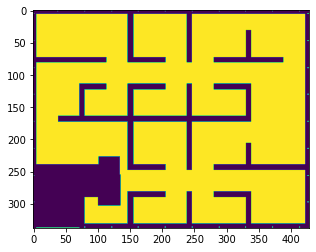

(255, 135)


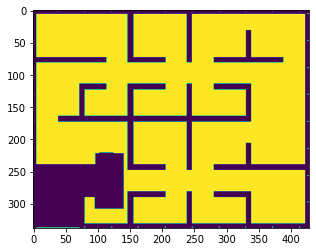

(221, 103)


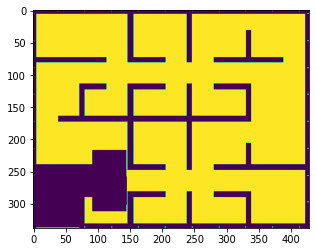

(258, 145)


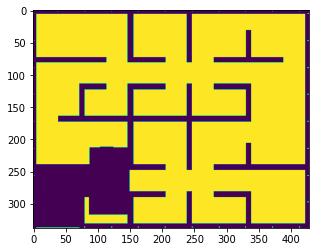

(212, 124)


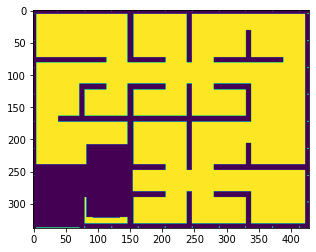

(321, 93)


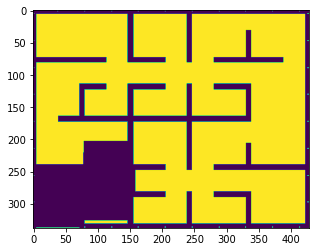

(221, 78)


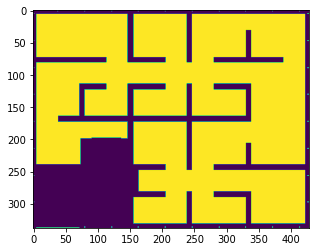

(198, 91)


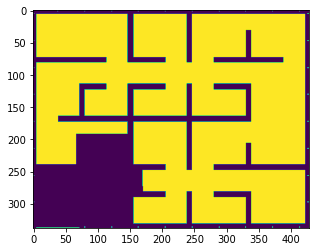

(273, 170)


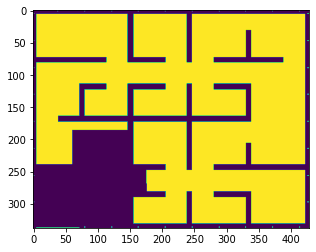

(269, 176)


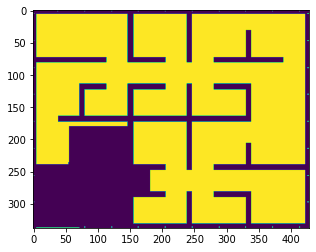

(236, 55)


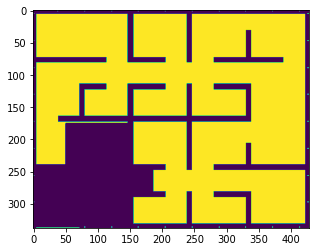

(176, 50)


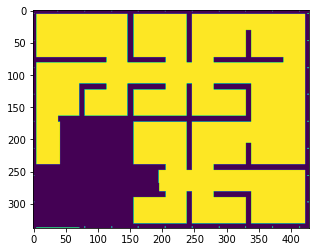

(268, 195)


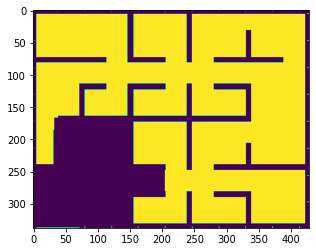

(186, 32)


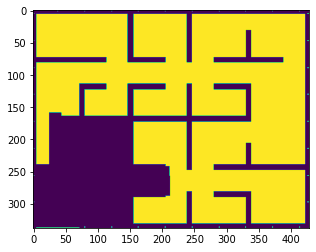

(257, 212)


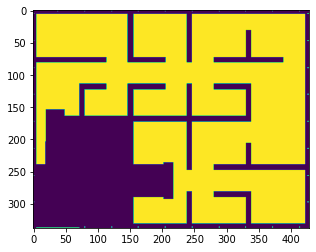

(204, 19)


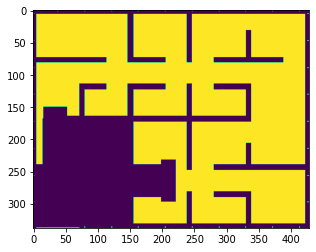

(168, 15)


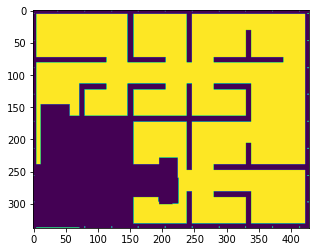

(296, 195)


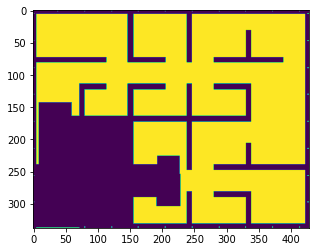

(254, 228)


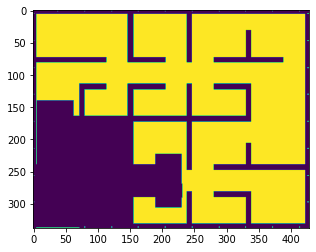

(269, 231)


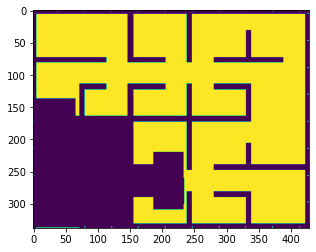

(300, 234)


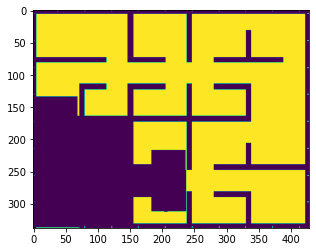

(312, 208)


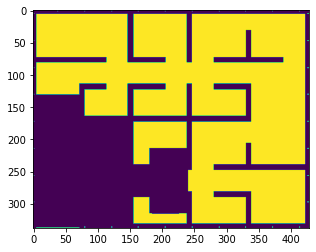

(315, 185)


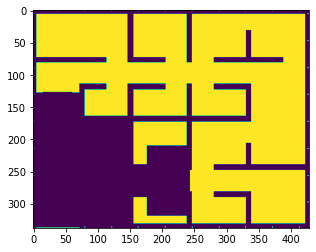

(127, 15)


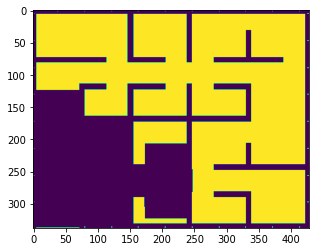

(304, 173)


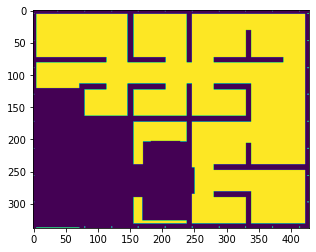

(203, 183)


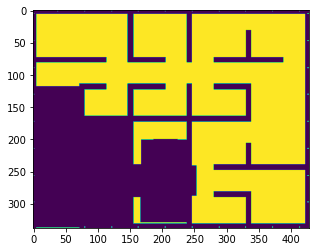

(200, 187)


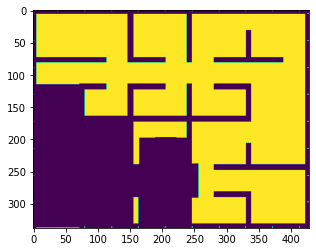

(197, 222)


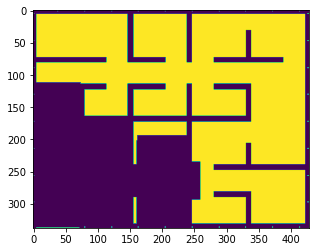

(202, 161)


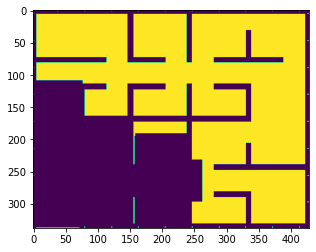

(195, 158)


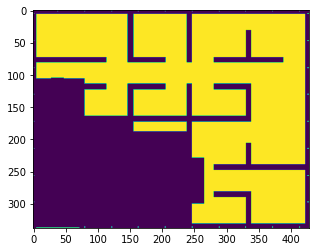

(105, 28)


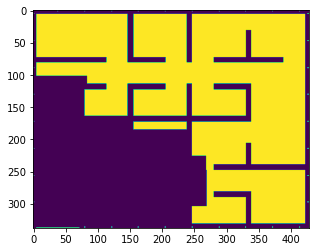

(248, 269)


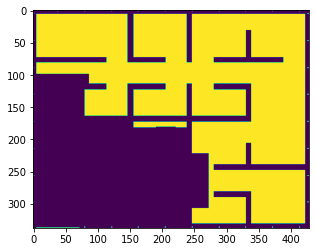

(181, 221)


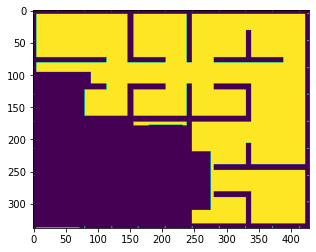

(178, 232)


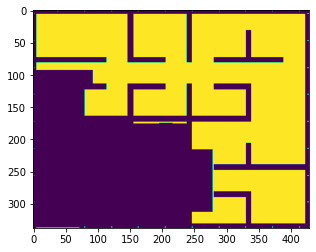

(175, 216)


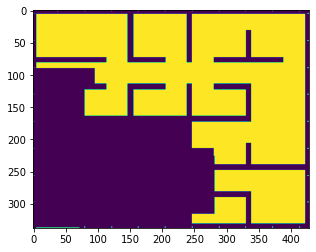

(226, 281)


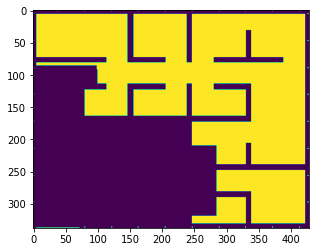

(92, 99)


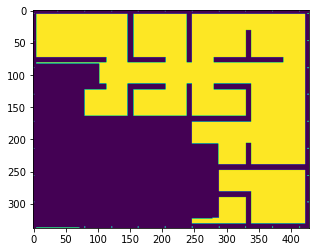

(322, 278)


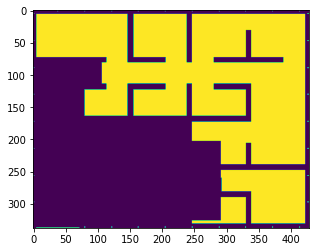

(260, 292)


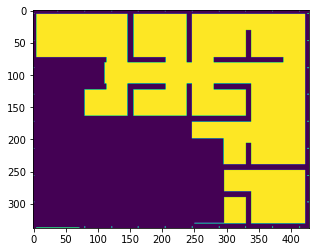

(330, 250)


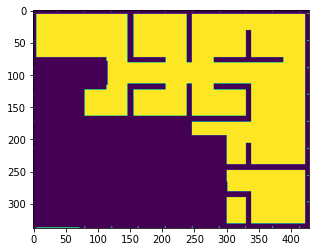

(266, 301)


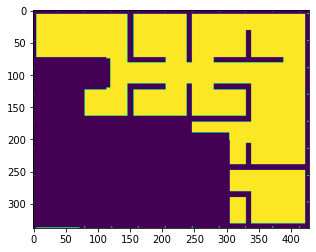

(202, 305)


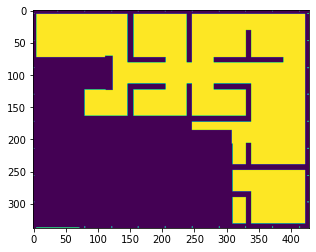

(207, 309)


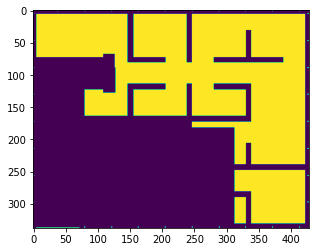

(89, 127)


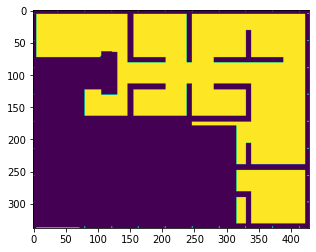

(71, 105)


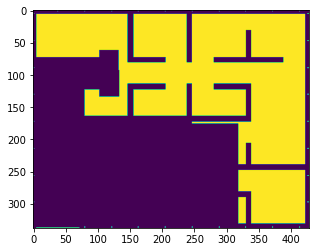

(133, 133)


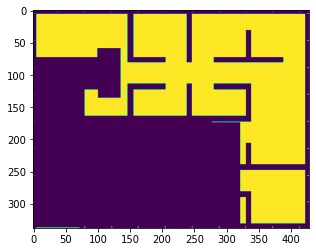

(173, 277)


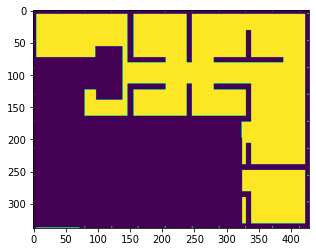

(198, 324)


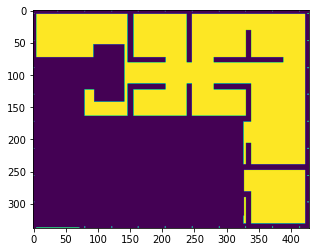

(318, 327)


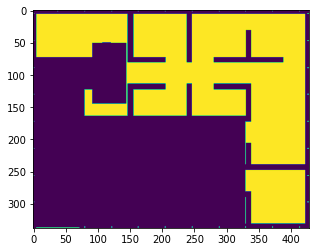

(50, 120)


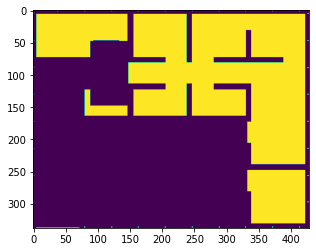

(47, 94)


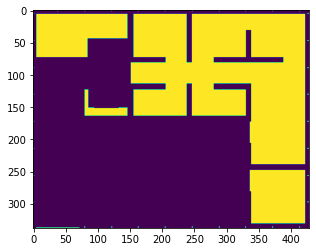

(151, 95)


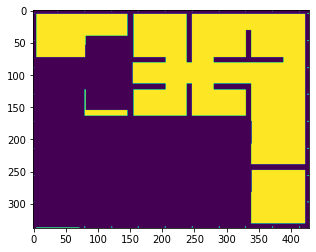

(54, 81)


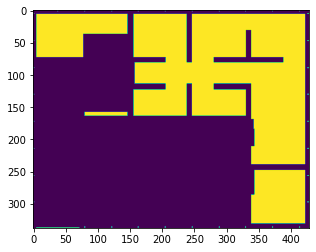

(184, 343)


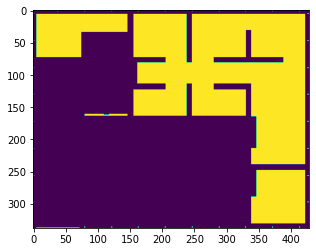

(161, 110)


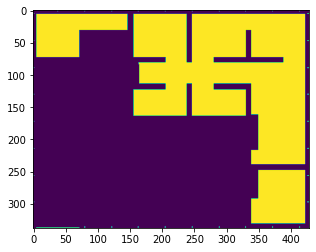

(84, 164)


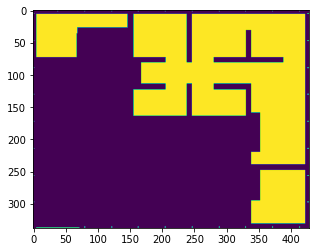

(36, 68)


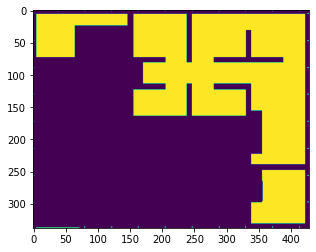

(295, 356)


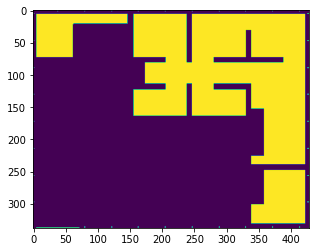

(22, 62)


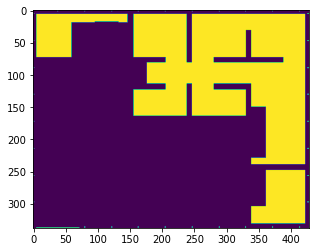

(18, 132)


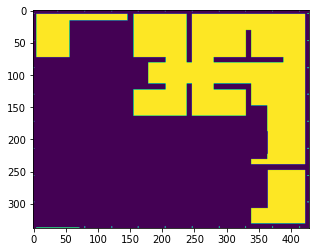

(222, 364)


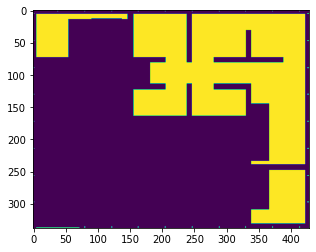

(13, 137)


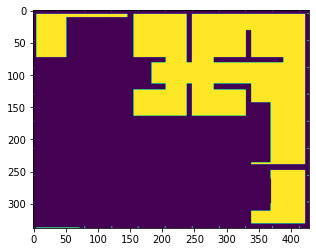

(299, 369)


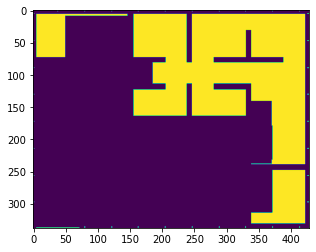

(231, 371)


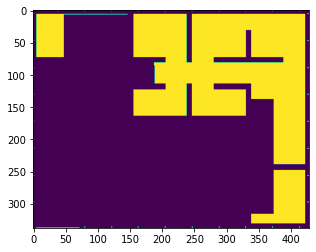

(86, 188)


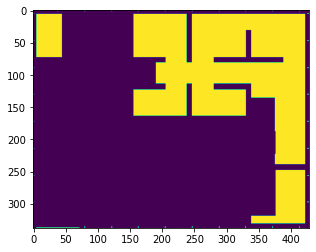

(222, 376)


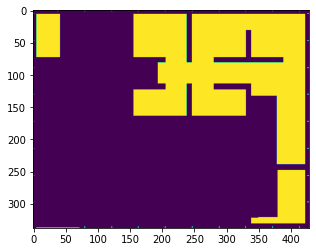

(321, 349)


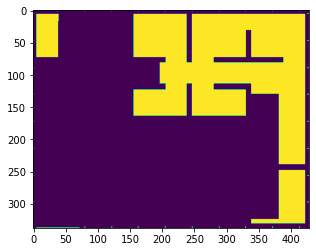

(17, 39)


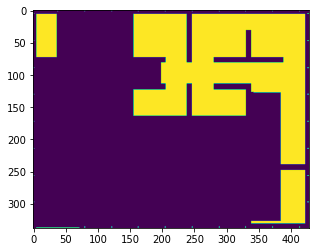

(127, 342)


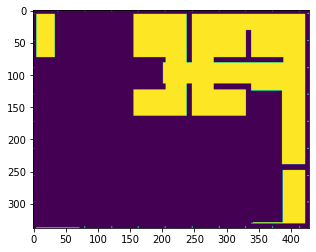

(329, 341)


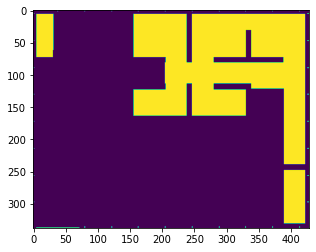

(62, 31)


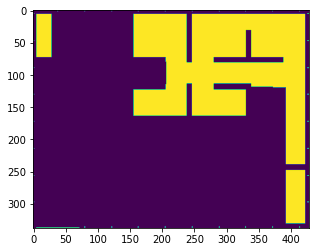

(119, 372)


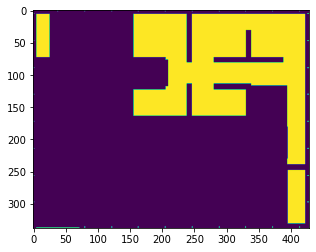

(229, 395)


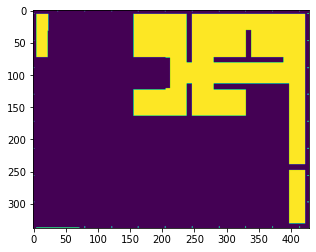

(32, 23)


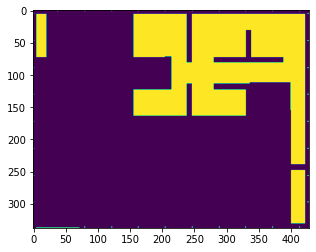

(155, 400)


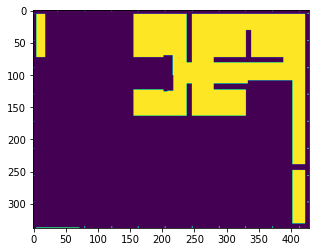

(125, 203)


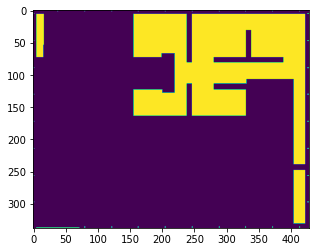

(54, 16)


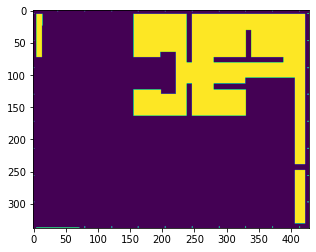

(24, 14)


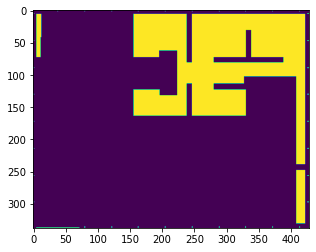

(42, 12)


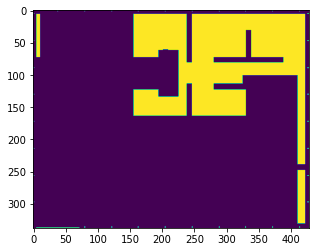

(61, 202)


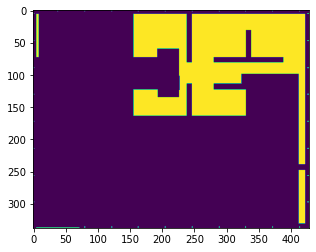

(102, 227)


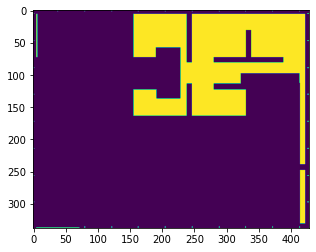

(113, 414)


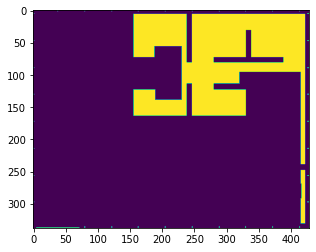

(291, 416)


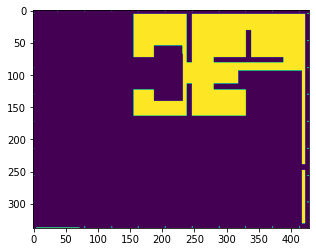

(68, 232)


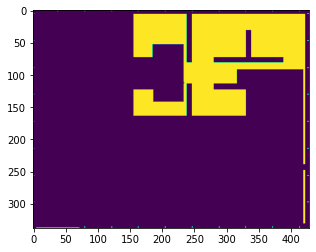

(112, 234)


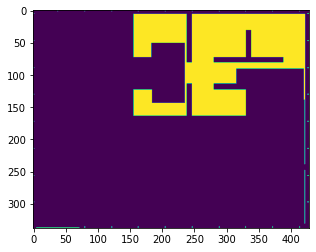

(139, 421)


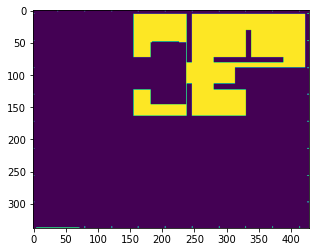

(49, 185)


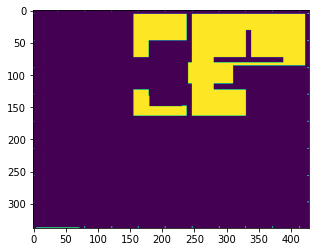

(132, 180)


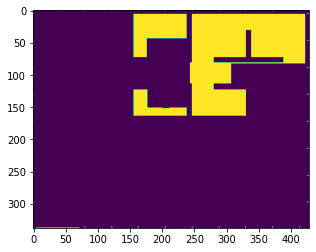

(151, 211)


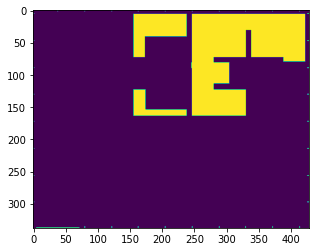

(90, 246)


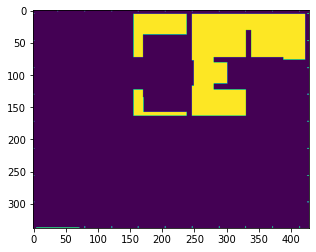

(134, 171)


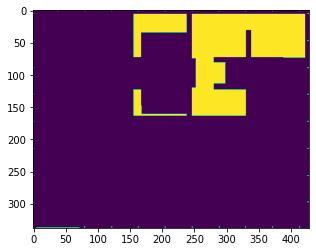

(147, 168)


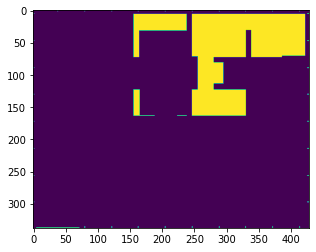

(163, 223)


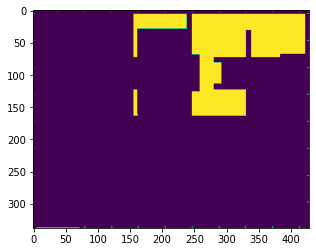

(160, 162)


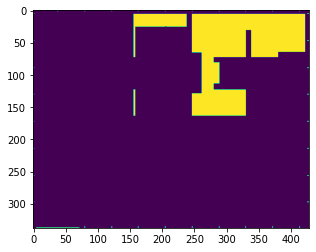

(25, 206)


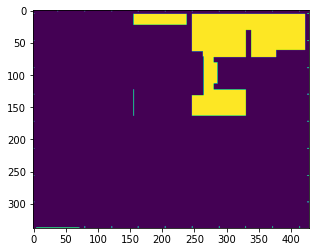

(72, 264)


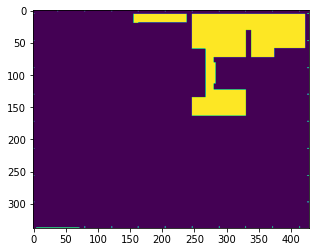

(19, 164)


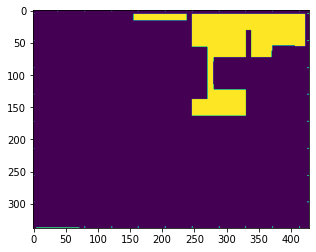

(63, 371)


KeyboardInterrupt: ignored

In [274]:
explored = []
stack = []
stack.append( (start[0], start[1]))
iter = 0
while end not in explored:
  iter += 1
  #print(len(explored))
  point = stack.pop(0)
  grid_cpy[point[0], point[1]] = 0
  if iter%1000 == 0:
    plt.imshow(grid_cpy)
    plt.show()
    print(point)
  explored.append(point)
  x,y = point      #x is row and y is column
  p1 =  (x,y-1)            #left
  p2 =  (x, y+1)            #right
  p3 =  (x-1, y)           #top
  p4 =   (x+1, y)           #bottom

  p5 =  (x-1,y-1)            # digonal
  p6 =  (x-1, y+1)            #digonal
  p7 =  (x+1, y-1)           #digonal
  p8 =   (x+1, y+1)           #digonal

  p = [p1,p2,p3,p4, p5, p6, p7, p8]

  for ptemp in p:
    if ptemp[0] < grid.shape[0]-1 and ptemp[1] < grid.shape[1]-1 and ptemp[0] >= 0 and ptemp[1] >= 0 and grid[ptemp[0], ptemp[1]] != 0:
      if ptemp not in explored and ptemp not in stack:
        stack.append(ptemp)

In [275]:
print("The no of iterations to do BFS: ", iter)

The no of iterations to do BFS:  105455


## A* search

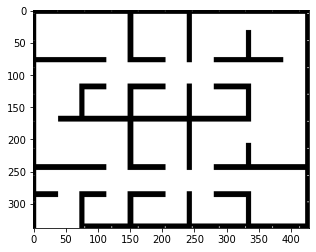

In [276]:
plt.imshow(grid, cmap= 'gray')
plt.show()

In [277]:
grid_cpy = grid.copy()

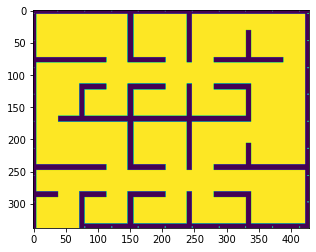

In [278]:
plt.imshow(grid_cpy)

In [279]:
start = (330, 10)
goal = (25, 400)

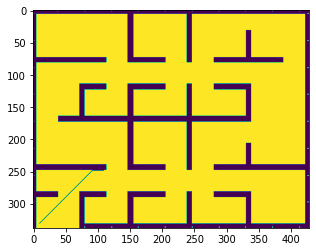

(248, 109)
0



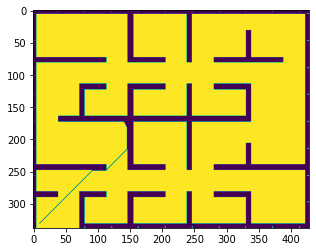

(180, 145)
0



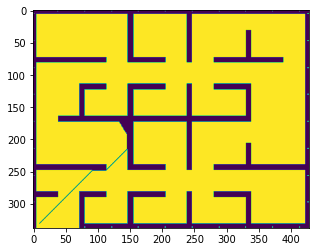

(175, 135)
0



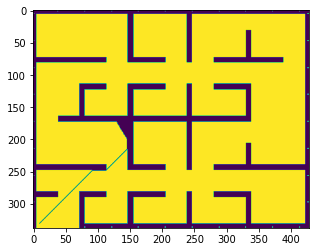

(184, 136)
0



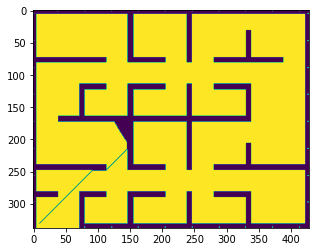

(199, 142)
0



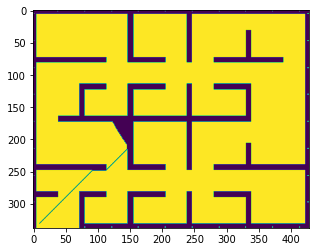

(183, 129)
0



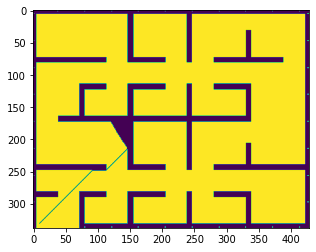

(203, 139)
0



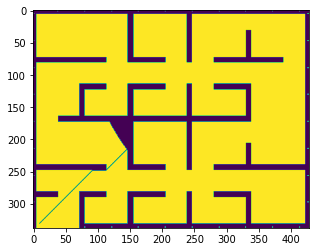

(208, 140)
0



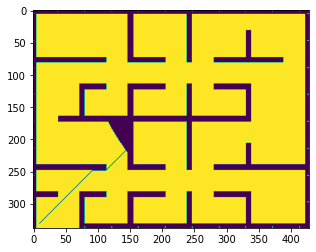

(214, 142)
0



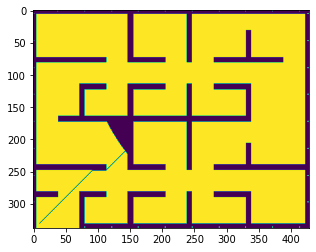

(190, 124)
0



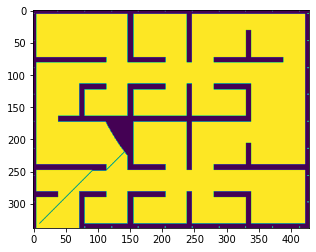

(198, 127)
0



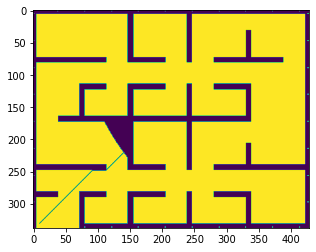

(204, 129)
0



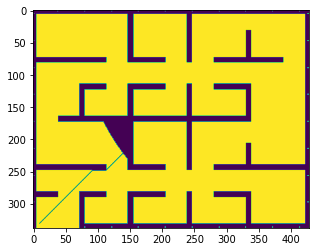

(189, 118)
0



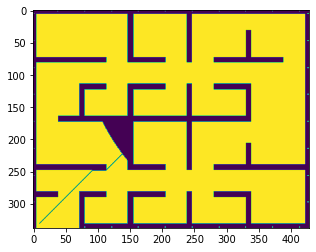

(227, 142)
0



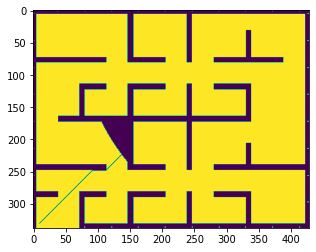

(228, 141)
0



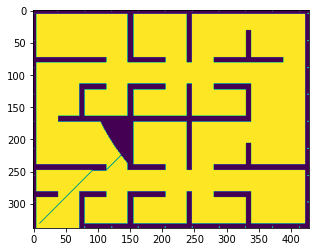

(225, 137)
0



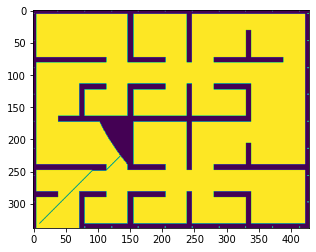

(186, 110)
0



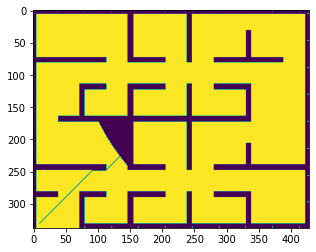

(192, 112)
0



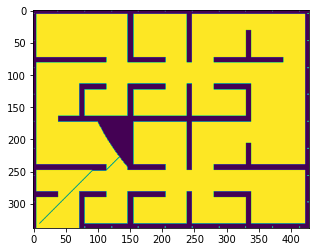

(191, 110)
0



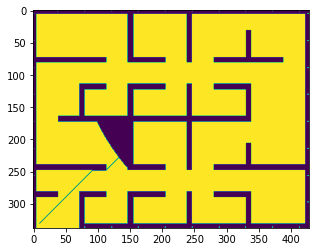

(214, 123)
0



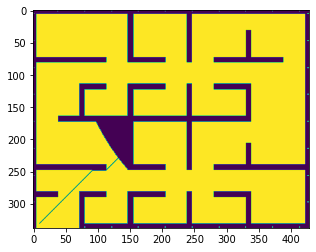

(216, 123)
0



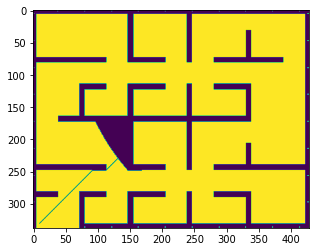

(248, 168)
0



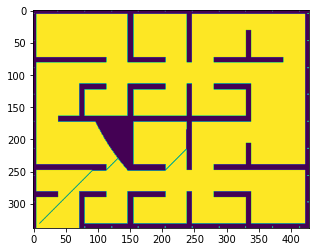

(185, 238)
0



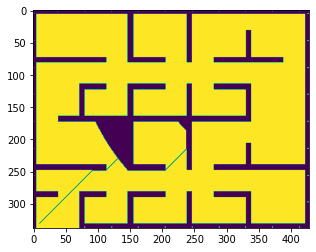

(176, 228)
0



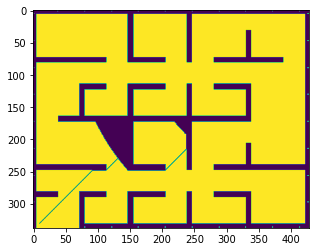

(191, 236)
0



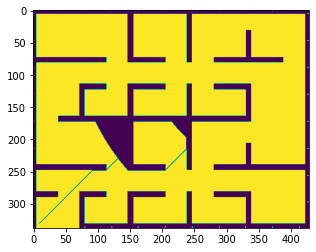

(182, 223)
0



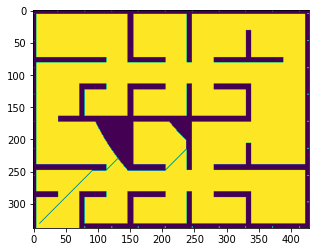

(178, 216)
0



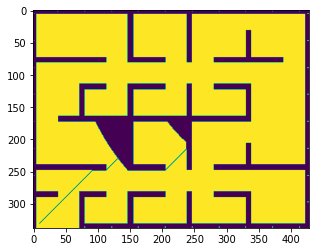

(199, 232)
0



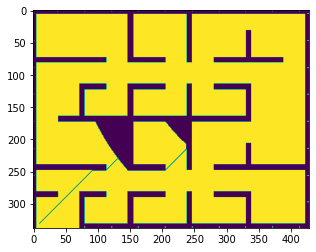

(202, 232)
0



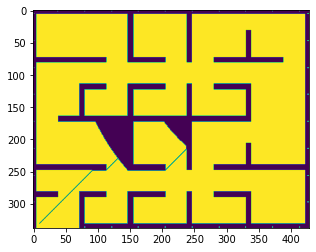

(202, 229)
0



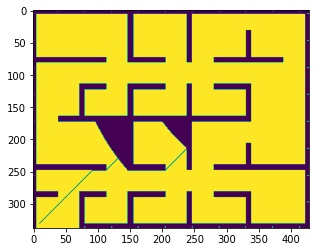

(173, 201)
0



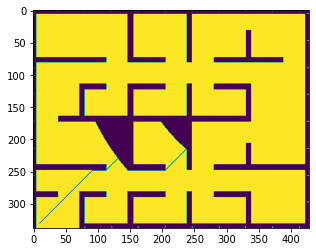

(207, 229)
0



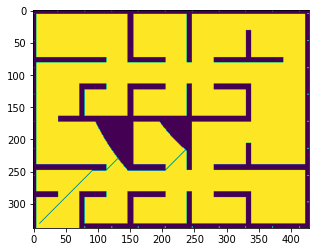

(180, 202)
0



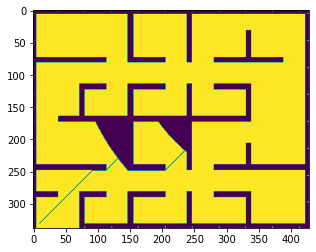

(204, 221)
0



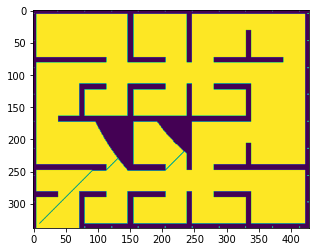

(203, 218)
0



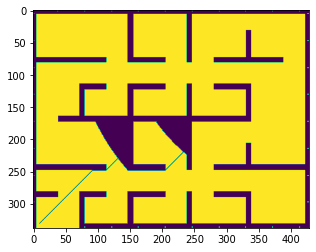

(181, 197)
0



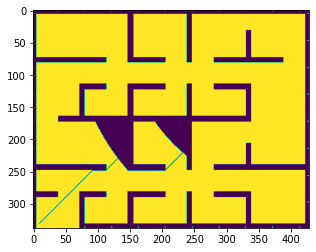

(204, 215)
0



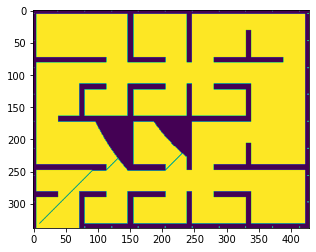

(206, 215)
0



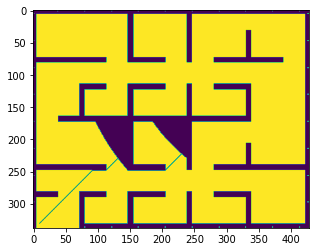

(180, 191)
0



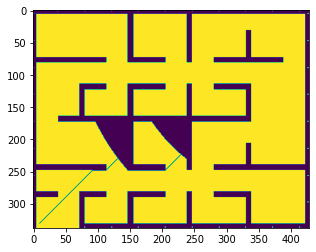

(198, 204)
0



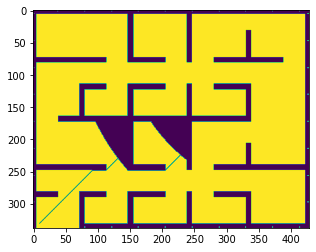

(180, 188)
0



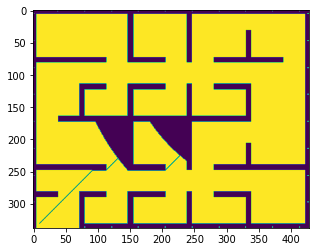

(217, 219)
0



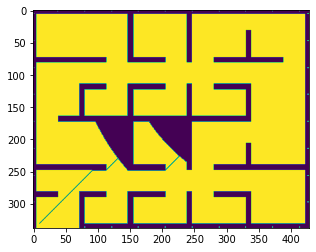

(225, 226)
0



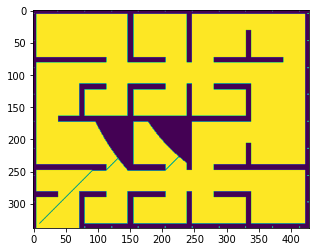

(196, 196)
0



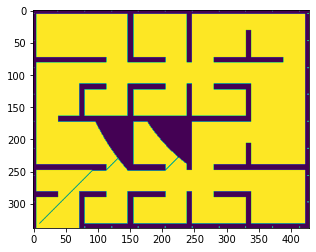

(228, 226)
0



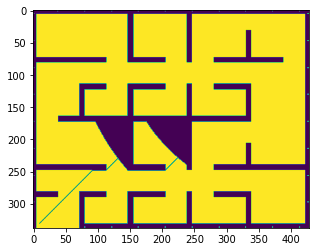

(191, 189)
0



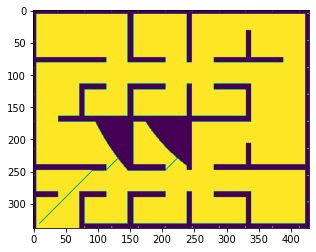

(210, 204)
0



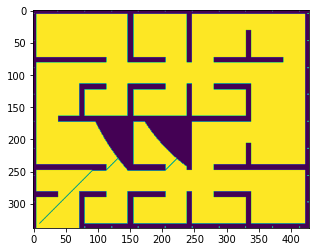

(188, 184)
0



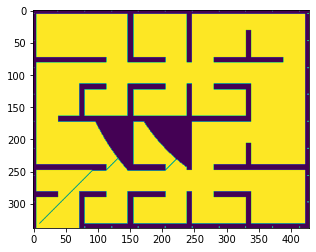

(187, 182)
0



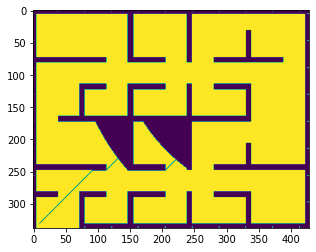

(228, 218)
0



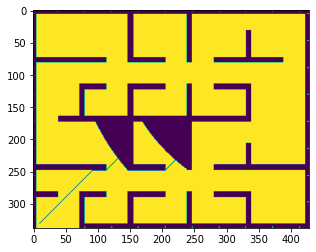

(217, 205)
0



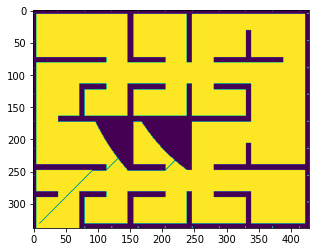

(246, 237)
0



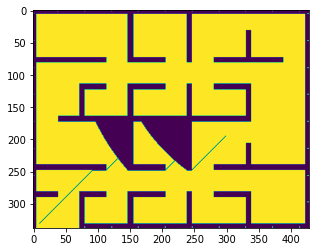

(195, 299)
0



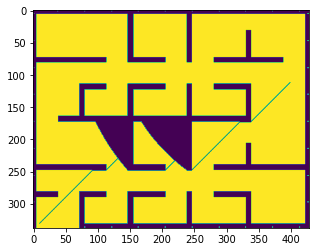

(112, 399)
0



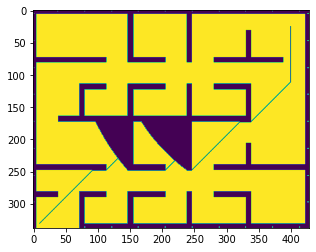

In [280]:
itr = 0
dict_huristics = {}
explored = []
dict_huristics[start] = (  ((goal[0] - start[0])**2 + (goal[1] - start[1])**2)**0.5  , 0)

while goal not in explored:
    itr += 1
    point = min(dict_huristics, key= dict_huristics.get )
    huristic, val = dict_huristics[start]

    #print(val)
    #print(point)
    grid_cpy[point[0], point[1]] = 0
    if itr%100 == 0:
      plt.imshow(grid_cpy)
      plt.show()
      print(point)
      print(val)
      print()
    
    
    explored.append(point)
    dict_huristics[point] = (999999,0)
   
    x,y = point      #x is row and y is column
    p1 =  (x,y-1)            #left
    p2 =  (x, y+1)            #right
    p3 =  (x-1, y)           #top
    p4 =   (x+1, y)           #bottom

    p5 =  (x-1,y-1)            # digonal
    p6 =  (x-1, y+1)            #digonal
    p7 =  (x+1, y-1)           #digonal
    p8 =   (x+1, y+1)           #digonal

    p = [p1,p2,p3,p4, p5, p6, p7, p8]

    for ptemp in p:
      if ptemp[0] < grid.shape[0]-1 and ptemp[1] < grid.shape[1]-1 and ptemp[0] >= 0 and ptemp[1] >= 0 and grid[ptemp[0], ptemp[1]] != 0:
        if ptemp not in explored :

          dict_huristics[ptemp] = (  ((goal[0] - ptemp[0])**2 + (goal[1] - ptemp[1])**2)**0.5 + (val +1) , (val+1))



plt.imshow(grid_cpy)
plt.show()


In [281]:
print("The no of iterations in A* search: ", iter)

The no of iterations in A* search:  105455


In [282]:
cv2.imwrite('binary_grid.png', grid)

True